In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import normaltest
from scipy.stats import mannwhitneyu
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")


No Warning Shown


# <font color=red> Conhecendo o Projeto</font>

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>
    
Projeto Data Science - DataVis

Suponha que você recebeu o seguinte e-mail de um cliente cuja empresa atua no
setor de móveis e toda a receita é proveniente das vendas online:

Bom dia, tudo bem?

Temos o nosso site de vendas e criamos o blog com conteúdo há
aproximadamente 3 meses atrás. Com o nosso time de BI nós conseguimos
mapear algumas métricas:

● Data;

● O número total de pessoas que acessaram o blog por dia;

● O número de pessoas que acessaram o site e não passaram pelo blog
por dia;

● O número total de compras de pessoas que passaram pelo blog por dia;

● O número total de compras de pessoas que não passaram pelo blog por
dia;

● Receita das compras que passaram ou não pelo blog por dia receita.


Queremos entender qual é a influência de um blog da nossa marca para
que as pessoas venham a comprar nossos produtos em algum momento. Seria
possível realizar uma análise?
Peço que me envie um relatório com gráficos e tabelas que mostre as
informações de maneira organizada e que auxilie as decisões que tomaremos
neste ano a respeito do blog, além das conclusões que conseguirem tirar.
Esse relatório será analisado em uma reunião com todos os diretores da
empresa. Peço que o design seja levado em consideração.
Posso contar com você?.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>

Neste contexto o objetivo principal do nosso projeto 

1) Construir um relatório ou dashboard
    
Os dados necessários para a construção da dashboard se encontram anexos ao e-mail
em um arquivo CSV. Fique à vontade para utilizar a ferramenta que achar mais
conveniente.
    
Algumas sugestões de ferramentas:

● Google Data Studio

● Google Sheets

● Python

● R
    
    
Abaixo há algumas abordagens que serão consideradas um diferencial. Não tem
problema se você não teve experiências prévias com essas metodologias, o importante
é você se desafiar e tentar aplicar na análise. Estes materiais irão te auxiliar e não é
necessário aplicar todas as técnicas abaixo:

● Análises com embasamento estatístico, utilizando teste de hipóteses ou
correlação.

● Utilizar métodos de aprendizado de máquina, como regressão, séries temporais
ou outro que julgar adequado.

● Descreva os pressupostos e o passo a passo para chegar à sua conclusão,
lembre-se de citar as técnicas utilizadas e sob quais condições você poderia
utilizá-las ou não.
    
Não esqueça de dar permissão para que qualquer pessoa com o link possa visualizar a
dashboard. Caso esteja utilizando alguma das ferramentas sugeridas, basta ir em
Compartilhar -> Avançado -> Alterar -> Ativado: Qualquer Pessoa com o Link -> Salvar</p>






# <font color=red> Conhecendo o Dataset</font>




## Leitura dos dados e Análises preliminares

In [2]:
dados = pd.read_csv('psel.csv')

In [3]:
dados.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349184,0,4693,0,46739
1,2019-01-02,867328,0,8501,0,83129
2,2019-01-03,758590,0,9375,0,86067
3,2019-01-04,688873,0,8405,0,69363
4,2019-01-05,441760,0,6136,0,56183


In [4]:
dados.shape

(639, 6)

In [5]:
dados.isna().sum().sum()

0

In [6]:
dados.dtypes

data               object
receita             int64
transacoes_blog     int64
transacoes_site     int64
usuarios_blog       int64
usuarios_site       int64
dtype: object

## Estatísticas descritivas

In [7]:
dados.describe().round(2)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
count,639.00,639.00,639.00,639.00,639.00
mean,1623891.19,528.35,19039.14,1439.85,101610.49
std,1160581.16,1201.78,13677.73,3369.87,37240.23
min,32085.00,0.00,3557.00,0.00,26298.00
25%,807342.00,0.00,11013.00,0.00,77727.00
50%,1263161.00,0.00,16069.00,0.00,96104.00
75%,2232769.50,0.00,22606.50,0.00,117586.50
max,12266844.00,5586.00,188955.00,13059.00,369989.00


### Matriz de correlação

 O coeficiente de correlação é uma medida de associação linear entre duas variáveis e situa-se entre -1 e +1 sendo que -1 indica associação negativa perfeita e +1 indica associação positiva perfeita.
 A análise correlacional indica a relação entre 2 variáveis lineares e os valores sempre serão entre +1 e -1. O sinal indica a direção, se a correlação é positiva ou negativa, e o tamanho da variavel indica a força da correlação.

 Cabe observar que, como o coeficiente é concebido a partir do ajuste linear, então a fórmula não contém informações do ajuste, ou seja, é composta apenas dos dados.

In [8]:
dados.corr().round(4)

,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
receita,1.0000,0.5317,0.8126,0.5180,0.7112
transacoes_blog,0.5317,1.0000,0.0689,0.8933,0.1623
transacoes_site,0.8126,0.0689,1.0000,0.0543,0.8200
usuarios_blog,0.5180,0.8933,0.0543,1.0000,0.1518
usuarios_site,0.7112,0.1623,0.8200,0.1518,1.0000


<AxesSubplot:>

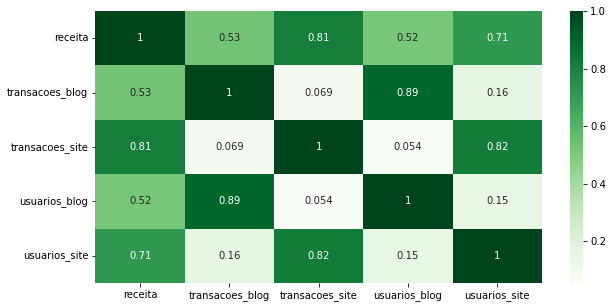

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(dados.corr(), annot=True, cmap='Greens')

## Interpretando o coeficiente de Pearson

 
#### 0.9 para mais ou para menos indica uma correlação muito forte.
#### 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
#### 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
#### 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
#### 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# <font color=red> Boxplot, Distribuição de frequência e Comportamento da variável Dependente Receita</font>



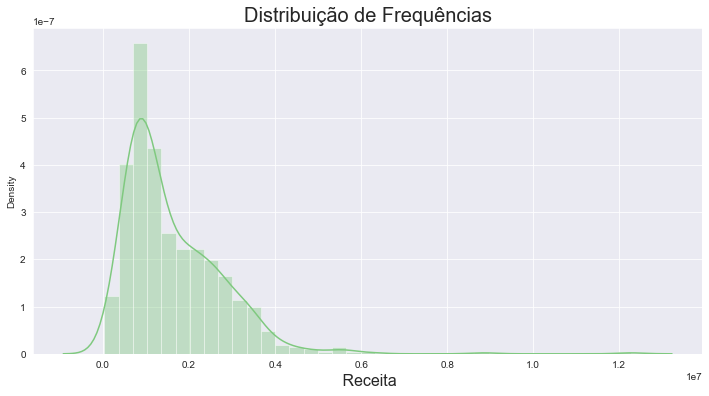

In [67]:
ax = sns.distplot(dados['receita'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel(' Receita', fontsize=16)
ax = ax

## Box plot da variável *dependente* (y)

In [10]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

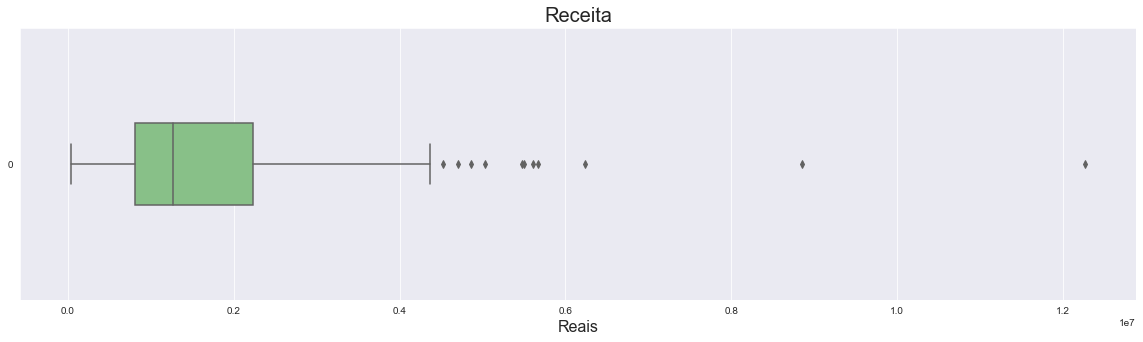

In [11]:
ax = sns.boxplot(data=dados['receita'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Receita', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax = ax

## Distribuição de frequências da variável *dependente* (y)

 Com auxílio do boxplot e da distribuição de frequência, foi identificado a assimetria a direita do dado  analisando,  pois  existe uma maior concentração de valores na zona de valores mais reduzidos da amostra.

No boxplot analisado, há um grupo de pessoas que efetuam compras muito acima do comportamento geral da base de dados, e isso aumenta de certa forma a variabilidade , porém, para esse estudo em especial, não achei condizente retirar os dados e analisa-los a parte. Para diminuir o impacto, antes de rodar o modelo normalizei com transformação logarítmica e no final da modelagem reverti a transformação para me dar o valor real.

# <font color=red> Dispersão Entre as Variáveis do Dataset</font>


#### Identificação se a variável dependente e as variáveis explicativas possuem alguma relação linear. 

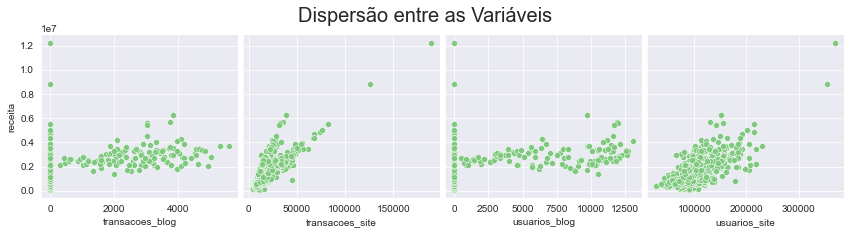

In [12]:
ax = sns.pairplot(dados, y_vars='receita', x_vars=['transacoes_blog', 'transacoes_site', 'usuarios_blog', 'usuarios_site'], height=3)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax = ax

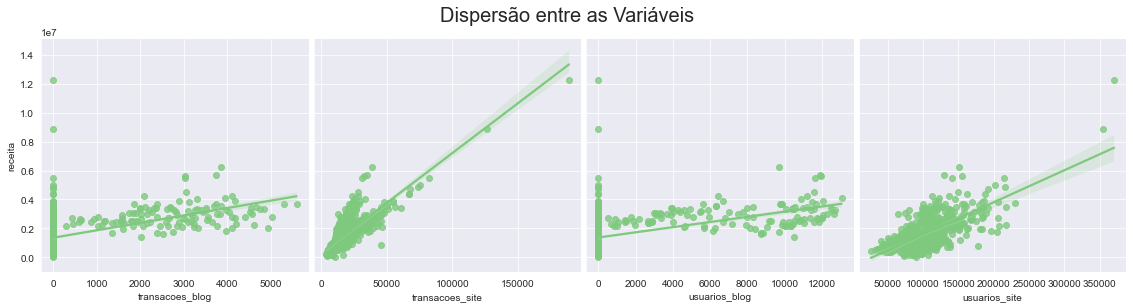

In [13]:
ax = sns.pairplot(dados, y_vars='receita', x_vars=['transacoes_blog', 'transacoes_site', 'usuarios_blog', 'usuarios_site'],kind = 'reg', height=4)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax = ax

#### Visualmente nossa variável receita possue uma relação linear com as outras variáveis do nosso dataset, como demonstrado no gráfico de dispersão entre as variáveis, algumas com uma relação mais forte e outras com uma relação mais discreta.

# <font color=red> Transformando os Dados para tentar corrigir a assimetria da variável receita</font>



### Por quê?



 Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).

Descobrimos que a variável dependente que estamos analisando é assimétrica à direita então utilizarei uma técnica de transformação de variável para tentar corrigir esse problema e, quem sabe, estimar um modelo de regressão linear com essa base de dados, após a transformação.

## Aplicando a transformação logarítmica aos dados do dataset



 A transformação logarítmica é frequentemente usada quando os dados têm uma distribuição distorcida positivamente e existem alguns valores grandes. Então irei usar a transformação de log para tornar as variações mais constantes e normalizar os dados.

In [14]:
dados['log_receita'] = np.log(dados['receita'])
dados['log_usuarios_site'] = np.log(dados['usuarios_site'] )
dados['log_transacoes_site'] = np.log(dados['transacoes_site'] )
dados['log_transacoes_blog'] = np.log(dados['transacoes_blog']+1)
dados['log_usuarios_blog'] = np.log(dados['usuarios_blog'] + 1)


In [15]:
dados.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,log_receita,log_usuarios_site,log_transacoes_site,log_transacoes_blog,log_usuarios_blog
0,2019-01-01,349184,0,4693,0,46739,12.763354,10.752334,8.453827,0.0,0.0
1,2019-01-02,867328,0,8501,0,83129,13.673173,11.328149,9.047939,0.0,0.0
2,2019-01-03,758590,0,9375,0,86067,13.539217,11.362881,9.145802,0.0,0.0
3,2019-01-04,688873,0,8405,0,69363,13.442812,11.147109,9.036582,0.0,0.0
4,2019-01-05,441760,0,6136,0,56183,12.998522,10.936369,8.721928,0.0,0.0


## Distribuição de frequências da variável *dependente transformada* (y)

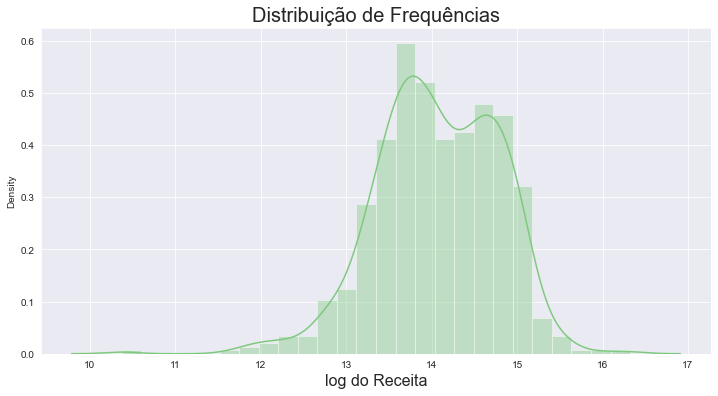

In [16]:
ax = sns.distplot(dados['log_receita'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Receita', fontsize=16)
ax = ax

Ápos a transformação logaritima a assimetria da variável receita assumiu uma forma mais normalizada.

### Gráficos de dispersão entre as variáveis transformadas do dataset

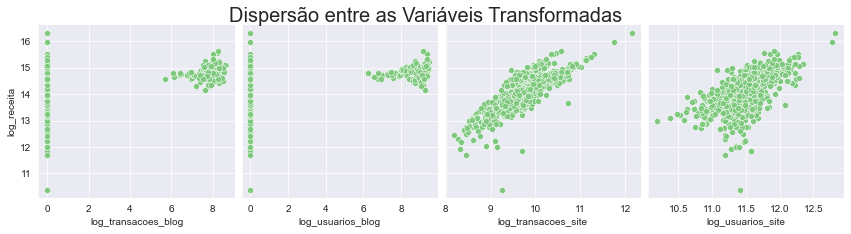

In [17]:
ax = sns.pairplot(dados, y_vars='log_receita', x_vars=['log_transacoes_blog', 'log_usuarios_blog', 'log_transacoes_site', 'log_usuarios_site'], height=3)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax = ax

## <font color=red> Verificando Relação Linear</font>




 Como os dados relativos ao blog são somente dos ultimos 3 meses por esse motivo no grafico de dispersao das variaveis transformadas eles estao em clusters no canto superior direito.

# <font color=red> Regressão Linear</font>




 A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

## <font color=red> Criando os *Datasets* de Treino e Teste</font>



## Criando uma Series (pandas) para armazenar o a receita (y)

In [18]:
y = dados['log_receita']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [19]:
X = dados[['log_transacoes_blog','log_usuarios_blog', 'log_transacoes_site', 'log_usuarios_site']]

### Criando os datasets de treino e de teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Estimando o modelo com statsmodels

In [21]:
X_train_com_constante = sm.add_constant(X_train)

In [22]:
X_train_com_constante

,const,log_transacoes_blog,log_usuarios_blog,log_transacoes_site,log_usuarios_site
334,1.0,0.000000,0.000000,11.126895,12.166193
227,1.0,0.000000,0.000000,9.667322,11.257375
497,1.0,0.000000,0.000000,10.450423,11.802823
125,1.0,0.000000,0.000000,9.546884,11.709314
344,1.0,0.000000,0.000000,10.823671,11.988439
...,...,...,...,...,...
585,1.0,7.832014,9.077038,9.313619,11.855401
580,1.0,8.628198,9.183072,10.133488,11.974103
341,1.0,0.000000,0.000000,10.179489,11.649665
84,1.0,0.000000,0.000000,9.489940,11.646494


In [23]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

## <font color=red>Avaliando o Modelo Estimado</font>






## Avaliando as estatísticas de teste do modelo

In [24]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:            log_receita   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     588.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.10e-188
Time:                        11:01:52   Log-Likelihood:                -110.80
No. Observations:                 511   AIC:                             231.6
Df Residuals:                     506   BIC:                             252.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   6.0846    


 P>|t| é o equivalente ao Prob (F-statistic) então funciona da mesma maneira que ele. Identificamos que o parâmetro não é estatisticamente significativo, ou seja, ele tá dizendo que esse parâmetro. Nota-se, portanto, que o parâmetro log_transacoes_blog     não passa no testes, que testa se "esse cara é igual a zero ou não".

## <font color=red>Estimando o Modelo com os Dados de Treino</font>



## Instanciando a classe LinearRegression()

In [25]:
modelo = LinearRegression()

## Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

In [26]:
modelo.fit(X_train, y_train)

LinearRegression()

 ## Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"

In [27]:
y_previsto = modelo.predict(X_test)

## <font color=red>Obtendo Previsões Pontuais</font>



## Dados de entrada

In [28]:
entrada = X_test[0:1]
entrada

,log_transacoes_blog,log_usuarios_blog,log_transacoes_site,log_usuarios_site
173,0.0,0.0,9.284891,10.987409


## Gerando previsão pontual

In [29]:
modelo.predict(entrada)[0]

13.607177088759753

## Invertendo a transformação logaritima para obter a estimativa em R$

In [30]:
np.exp(modelo.predict(entrada)[0])

811936.2358318871

## Criando um simulador simples

Quando se altera algum dos valores nas nossas variaveis abaixo nosso modelo automaticamente calcula o efeito em nossa receita.

In [89]:
transacoes_site =36
usuarios_blog = 65
usuarios_site = 1455
transacoes_blog = 13

entrada = [[np.log(transacoes_site),np.log(usuarios_site), np.log(transacoes_blog +1), np.log(usuarios_blog + 1)]]

print('{0:.3f}'.format(np.exp(modelo.predict(entrada)[0])))

6555.093


## <font color=red>Interpretação dos Coeficientes Estimados</font>




## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Receita) . No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [32]:
modelo.intercept_

6.084591058876745

In [33]:
np.exp(modelo.intercept_)

439.04023435051727

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$, medem as elasticidades de Y em relação a $X_2$ , $X_3$, $X_4$ e $X_5$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$, $X_3$ , $X_4$ e $X_5$ .</p>

In [34]:
modelo.coef_

array([-0.05982473,  0.13434663,  1.03071905, -0.18635223])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [35]:
X.columns

Index(['log_transacoes_blog', 'log_usuarios_blog', 'log_transacoes_site',
       'log_usuarios_site'],
      dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [36]:
index = ['Intercepto', 'log_transacoes_site', 'log_usuarios_site',  'log_usuarios_blog', 'log_transacoes_blog']

## Criando um DataFrame para armazenar os coeficientes do modelo

In [37]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,6.084591
log_transacoes_site,-0.059825
log_usuarios_site,0.134347
log_usuarios_blog,1.030719
log_transacoes_blog,-0.186352


## Interpretação dos Coeficientes Estimados

<p style='font-size: 16px; line-height: 2;  text-align: justify;'>
<b>Transações site </b> → Mantendo-se o valor de $X_2$ (transacoes_site) constante, um decréscimo de 1% no numero de transações do site gera, em média, um decréscimo de <b>0.06%</b> na receita.
</p>

<p style='font-size: 16px; line-height: 2;  text-align: justify;'>
<b>Usuários site </b> → Mantendo-se o valor de $X_3$ (usuários_site) constante, um acréscimo de 1% no numero de usuários do site gera, em média, um acrécimo de <b>0.13%</b> na receita.
</p>

<p style='font-size: 16px; line-height: 2;  text-align: justify;'>
<b>Usuários blog </b> → Mantendo-se o valor de $X_4$ (usuários_blog) constante, um acréscimo de 1% no numero de usuários do blog gera, em média, um acrécimo de <b>1.03%</b> na receita.
</p>

<p style='font-size: 16px; line-height: 2;  text-align: justify;'>
<b>Transações blog </b> → Mantendo-se o valor de $X_5$ (transacoes_blog) constante, um decréscimo de 1% no numero de Transações do blog gera, em média, um decréscimo de <b>0.18%</b> na receita.
</p>

## <font color=red>Análises Gráficas dos Resultados do Modelo</font>



## Gerando as previsões do modelo para os dados de TREINO

In [38]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

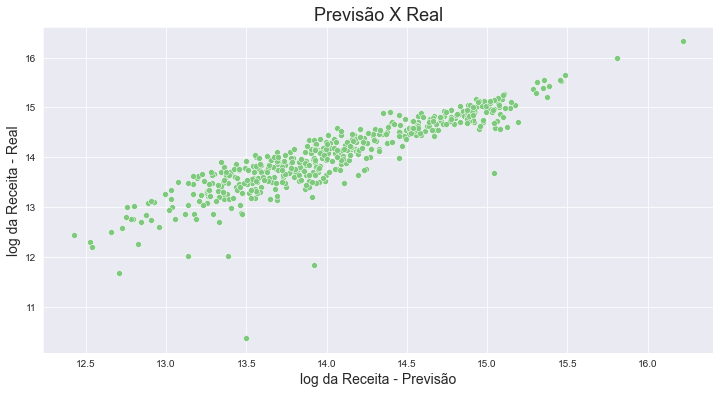

In [39]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log da Receita - Previsão', fontsize=14)
ax.set_ylabel('log da Receita - Real', fontsize=14)
ax = ax

### Como não temos uma grande dispersão em nosso gráfico, isso indica o quanto nossa estimativa está de certa maneira precisa. 

## Obtendo os resíduos

In [40]:
residuo = y_train - y_previsto_train

## Plotando a distribuição de frequências dos resíduos

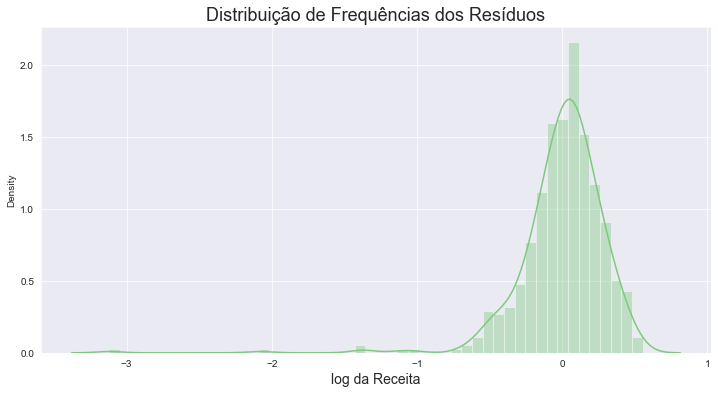

In [68]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log da Receita', fontsize=14)
ax = ax

#### Como resultado, teremos uma curva agradável que indica dados bem comportados, o que favorece um modelo bem estimado.


## <font color=red>Observações</font>




É importante frisar que este não de um modelo a ser usado comercialmente, que precisaria de mais variáveis e elementos para operar de maneira funcional. Contudo, conseguimos antever qual seria o comportamento adequado para que um modelo estimativo nos fornecesse informações seguras, e para este fim, nosso projeto cabe perfeitamente.

# <font color=green> TESTES DE HIPÓTESES</font>

 Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

## <font color=green> Teste de normalidade</font>

 A função *normaltest* testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

### Definindo a significância do teste ($\alpha$)

In [42]:
significancia = 0.05

### Testaremos nossas variaveis para saber como estão suas distribuições

### <font color=green>Testando a variável Receita</font> 

<AxesSubplot:>

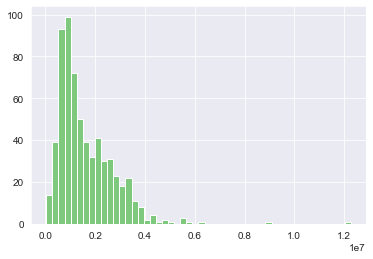

In [69]:
dados.receita.hist(bins = 50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [44]:
stat_test, p_valor = normaltest(dados.receita)
print(stat_test)
print(p_valor)

376.4558971365377
1.7932489979653222e-82


In [45]:
p_valor <= significancia

True

#### Como o P valor é maior ou igual a 0.5 que é nossa significancia H0 é rejeitado e a amostra não é proveniente de uma distribuição normal.

### <font color=green>Testando a variável usuários do blog</font>  

<AxesSubplot:>

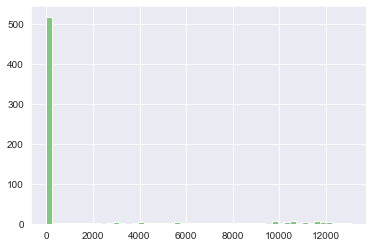

In [46]:
dados.usuarios_blog.hist(bins = 50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [47]:
stat_test, p_valor = normaltest(dados.usuarios_blog)
print(stat_test)
print(p_valor)

276.05496204188813
1.1361263738507747e-60


In [48]:
p_valor <= significancia

True

#### Como o P valor é maior ou igual a 0.5 que é nossa significancia H0 é rejeitado e a amostra não é proveniente de uma distribuição normal.

### <font color=green>Testando a variável usuários do site </font> 

<AxesSubplot:>

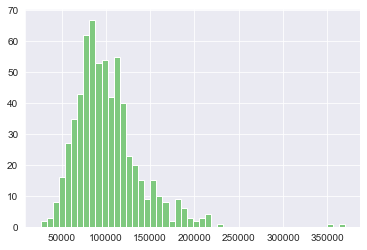

In [49]:
dados.usuarios_site.hist(bins = 50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [50]:
stat_test, p_valor = normaltest(dados.usuarios_site)
print(stat_test)
print(p_valor)

269.9584555228764
2.3947832487712726e-59


In [51]:
p_valor <= significancia

True

#### Como o P valor é maior ou igual a 0.5 que é nossa significancia H0 é rejeitado e a amostra não é proveniente de uma distribuição normal.

### <font color=green>Testando a variável transações do blog </font> 

<AxesSubplot:>

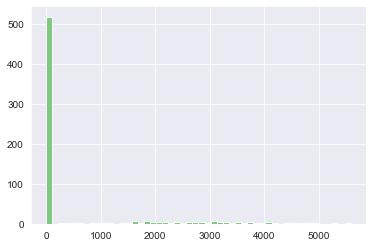

In [52]:
dados.transacoes_blog.hist(bins = 50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [53]:
stat_test, p_valor = normaltest(dados.transacoes_blog)
print(stat_test)
print(p_valor)

274.1832649193778
2.896413130631297e-60


In [54]:
p_valor <= significancia

True

#### Como o P valor é maior ou igual a 0.5 que é nossa significancia H0 é rejeitado e a amostra não é proveniente de uma distribuição normal.

### <font color=green>Testando a variável transações do site </font> 

<AxesSubplot:>

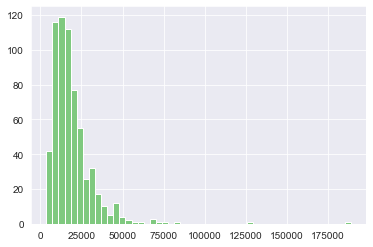

In [55]:
dados.transacoes_site.hist(bins = 50)

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [56]:
stat_test, p_valor = normaltest(dados.transacoes_site)
print(stat_test)
print(p_valor)

673.8096197338224
4.8317020805360967e-147


In [57]:
p_valor <= significancia

True

#### Como o P valor é maior ou igual a 0.5 que é nossa significancia H0 é rejeitado e a amostra não é proveniente de uma distribuição normal.

#### Conclusão do teste de normalidade das variaveis: 
Como rejeitamos todas as hipoteses das nossas variáveis e descobrimos que nossos dados não estão normalmente distribuidos, iremos usar testes não parametricos para testar nossas hipoteses.

# <font color=green> TESTES NÃO PARAMÉTRICOS</font>

Os testes não paramétricos, também conhecidos como testes de distribuição gratuita, são aqueles baseados em certas hipóteses, mas que não possuem uma organização normal. Geralmente, contêm resultados estatísticos provenientes de suas ordenações.

 Testes não paramétricos têm algumas limitações, entre eles, está que não são fortes suficientemente fortes quando uma hipótese normal é preenchida. Isso pode fazer com que não seja rejeitado, mesmo que seja falso. Outra de suas limitações é que necessitam que a hipótese seja alterada quando o teste não corresponde à questão do procedimento se a amostra não for proporcional.

## <font color='red'>Problema</font>

Em nosso dataset temos dados sobre o nosso site de vendas e criamos o blog com conteúdo há aproximadamente 3 meses atrás, e queremos entender qual influência de um blog da nossa marca.

Então selecionarei duas amostras em nosso dataset. Com o objetivo de comprovar tal influência sobre a receita da empresa  **testarei a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

# <font color=green>Teste de Mann-Whitney</font>
### Comparação de duas populações - amostras independentes
***

Mann-Whitney é um teste não paramétrico utilizado para verificar se duas amostras independentes foram selecionadas a partir de populações que têm a mesma média. Por ser um teste não paramétrico, Mann-Whitney torna-se uma alternativa ao teste paramétrico de comparação de médias.

In [58]:
usuarios_blog = dados.usuarios_blog
usuarios_site = dados.usuarios_site
transacoes_blog = dados.transacoes_blog
transacoes_site = dados.transacoes_site
receita = dados.receita

### <font color='red'>Critério do valor $p$</font>

> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

### <font color=green>Testando a variável usuários do blog e usuários do site </font> 

In [59]:
u, p_valor = mannwhitneyu(usuarios_blog, usuarios_site, alternative='less')
print(u)
print(p_valor)

0.0
2.391193425606197e-225


In [60]:
p_valor <= significancia

True

### <font color=green>Testando a variável transações do blog x transações do site </font> 

In [61]:
u, p_valor = mannwhitneyu(transacoes_blog, transacoes_site, alternative='less')
print(u)
print(p_valor)

134.0
4.689855769706814e-225


In [62]:
p_valor <= significancia

True

### <font color=green>Testando a variável usuários do blog x receita </font> 

In [63]:
u, p_valor = mannwhitneyu(usuarios_blog, receita, alternative='less')
print(u)
print(p_valor)

0.0
2.391204760924378e-225


In [64]:
p_valor <= significancia

True

### <font color=green>Testando a variável transações do blog x receita </font> 

In [65]:
u, p_valor = mannwhitneyu(transacoes_blog, receita, alternative='less')
print(u)
print(p_valor)

0.0
2.391200982478832e-225


In [66]:
p_valor <= significancia

True

### <font color='green'>Conclusão: De acordo com os resultados aceitamos hipótese de que existe uma influência do  blog em nossa marca, isto é, concluímos que a média dos usuarios e transaçoes no blog possuem influência sobre nossa receita.</font>